# MU4MEN01 - Introduction à l'optimisation

## Projet : Dimensionnement de stockage embarqué dans un tramway

### Objectifs du projet :

Lors de ce projet d'optimisation, nous essaierons de :
- Mettre en œuvre une démarche d’optimisation pour la conception d’un système,
- Comprendre le principe de l’alimentation électrique des tramways,
- Découvrir l’optimisation multi-critères et le concept d’optimalité au  sens de Pareto,
- Et mettre en œuvre l’algorithme génétique `NSGA-2`. 
___

### Étudiants : Jacques GUÉRIN (21112101) - William WU (21107936)
- mail 1 : jacques.guerin@etu.sorbonne-universite.fr
- mail 2 : William.Wu@etu.sorbonne-universite.fr
___

# 2.2 Dimensionnement du système de stockage

### Méthode de Monte-Carlo
On veut minimiser Vsst - Vtrain

Objectif 1 : Capacité en énergie de la batterie

Objectif 2 : Chute de tension maximale

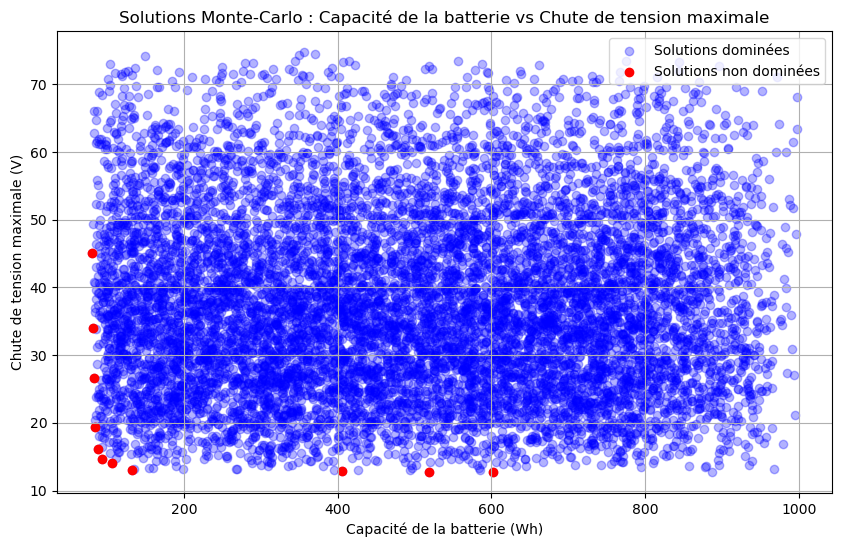

Solutions non dominées (Capacité de la batterie, Chute de tension maximale):
[[106.92917267  14.12184597]
 [405.32746762  12.94014397]
 [ 93.99398807  14.70725555]
 [ 83.25497508  26.63414443]
 [132.67288474  13.0247753 ]
 [ 82.33399201  34.02400996]
 [602.32417382  12.71611772]
 [ 80.74460978  45.09533808]
 [ 84.45440016  19.33353605]
 [518.19626701  12.74143257]
 [ 88.06019501  16.17057549]]


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres du système (à ajuster selon votre modèle)
max_battery_capacity = 1000  # Capacité maximale de la batterie en Wh
max_voltage_drop = 50        # Chute de tension maximale en volts (par rapport à la tension nominale de 500V)
n_samples = 10000            # Nombre d'échantillons Monte-Carlo

# Fonction pour simuler la capacité de la batterie et la chute de tension
# Cette fonction est un modèle simplifié à ajuster selon les dynamiques de votre système
def simulate_system(battery_capacity, voltage_drop_factor):
    # Simulation de la capacité de la batterie (en Wh)
    battery_energy = battery_capacity * np.random.uniform(0.8, 1.0)  # L'énergie varie entre 80% et 100% de la capacité maximale
    
    # Simulation de la chute de tension (en volts)
    voltage_drop = max_voltage_drop * np.random.uniform(0.5, 1.0) * voltage_drop_factor  # Facteur de variation de la chute
    
    return battery_energy, voltage_drop

# Échantillonnage aléatoire dans l'espace des décisions
battery_capacities = np.random.uniform(100, max_battery_capacity, n_samples)  # Capacité de la batterie entre 100Wh et la capacité maximale
voltage_drop_factors = np.random.uniform(0.5, 1.5, n_samples)  # Facteur de chute de tension entre 0.5 et 1.5

# Calcul des critères pour chaque échantillon
results = []
for i in range(n_samples):
    battery_energy, voltage_drop = simulate_system(battery_capacities[i], voltage_drop_factors[i])
    results.append([battery_energy, voltage_drop])

results = np.array(results)

# Fonction pour identifier les solutions non dominées (minimisation)
def non_dominated_sort(results):
    n = len(results)
    is_dominated = np.zeros(n, dtype=bool)
    
    for i in range(n):
        for j in range(n):
            # La solution j domine la solution i si elle est meilleure (plus petite) pour les deux critères
            if (results[j, 0] <= results[i, 0] and results[j, 1] <= results[i, 1]) and (i != j):
                is_dominated[i] = True
                break
    
    return results[~is_dominated]

# Identification des solutions non dominées
non_dominated_solutions = non_dominated_sort(results)

# Affichage des résultats
plt.figure(figsize=(10, 6))
plt.scatter(results[:, 0], results[:, 1], color='blue', alpha=0.3, label='Solutions dominées')
plt.scatter(non_dominated_solutions[:, 0], non_dominated_solutions[:, 1], color='red', label='Solutions non dominées')
plt.xlabel('Capacité de la batterie (Wh)')
plt.ylabel('Chute de tension maximale (V)')
plt.title('Solutions Monte-Carlo : Capacité de la batterie vs Chute de tension maximale')
plt.legend()
plt.grid(True)
plt.show()

# Afficher les solutions non dominées
print("Solutions non dominées (Capacité de la batterie, Chute de tension maximale):")
print(non_dominated_solutions)